In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r'C:/Users/anura/Desktop/Project 2- Big game Census Analytics/Notebook/final_cleaned_big_game_data.csv')

C:\Users\anura\AppData\Local\Temp\ipykernel_17404\842358777.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_count_per_state.index, y=player_count_per_state.values, palette='viridis')


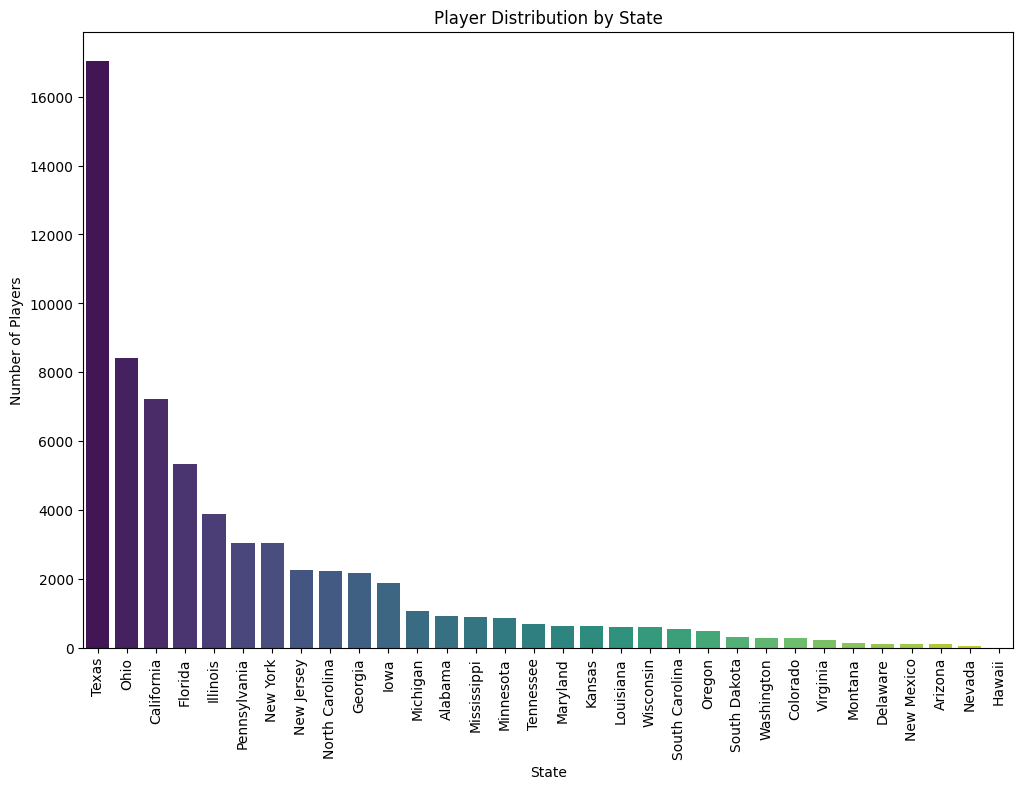

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players per state
player_count_per_state = df['state_name'].value_counts()

# Plot a bar chart for player distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=player_count_per_state.index, y=player_count_per_state.values, palette='viridis')
plt.title('Player Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()
# Save the plot as an image
plt.savefig('player_distribution_by_state.png')

C:\Users\anura\AppData\Local\Temp\ipykernel_20228\3489240028.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['state_name'].unique(), y=df.groupby('state_name')['players_per_capita'].max(), palette='coolwarm')


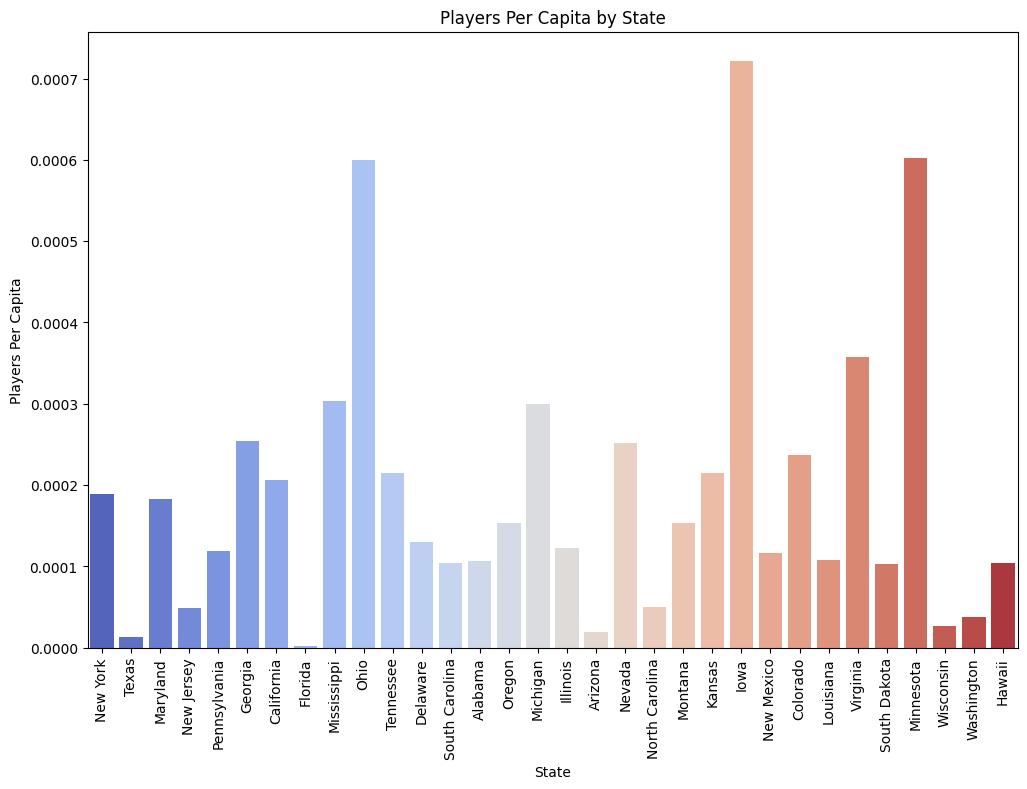

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate the ratio of players per capita
df['players_per_capita'] = df.groupby('state_name')['player_name'].transform('count') / df.groupby('state_name')['population_2017'].transform('first')

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=df['state_name'].unique(), y=df.groupby('state_name')['players_per_capita'].max(), palette='coolwarm')
plt.title('Players Per Capita by State')
plt.xlabel('State')
plt.ylabel('Players Per Capita')
plt.xticks(rotation=90)
plt.show()

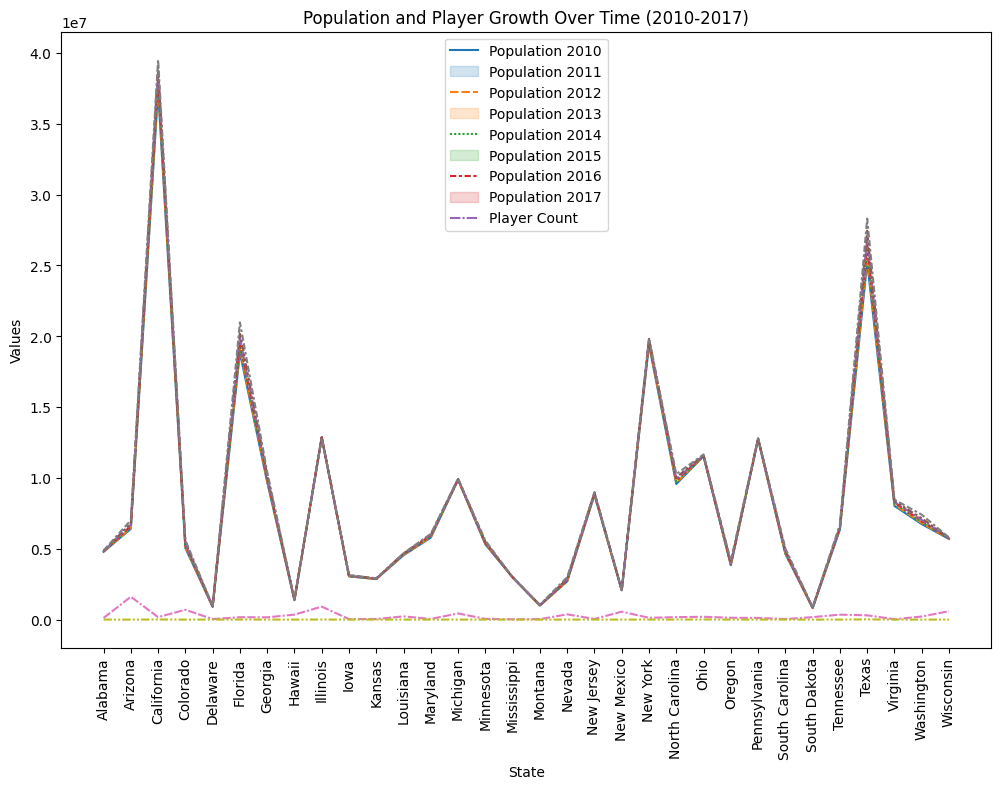

<Figure size 640x480 with 0 Axes>

In [ ]:
# Aggregate the population and player count by year
population_data = df[['state_name', 'population_2010_x', 'population_2011_x', 'population_2012_x', 'population_2013_x', 'population_2014_x', 'population_2015_x', 'population_2016', 'population_2017']].groupby('state_name').mean()
player_count_data = df.groupby('state_name')['player_name'].count()

# Merge the two datasets
merged_data = population_data.join(player_count_data)

# Plot the trend
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_data)
plt.title('Population and Player Growth Over Time (2010-2017)')
plt.xlabel('State')
plt.ylabel('Values')
plt.legend(labels=['Population 2010', 'Population 2011', 'Population 2012', 'Population 2013', 'Population 2014', 'Population 2015', 'Population 2016', 'Population 2017', 'Player Count'])
plt.xticks(rotation=90)
plt.show()

C:\Users\anura\AppData\Local\Temp\ipykernel_20228\2828248611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_player_count.index, y=team_player_count.values, palette='magma')


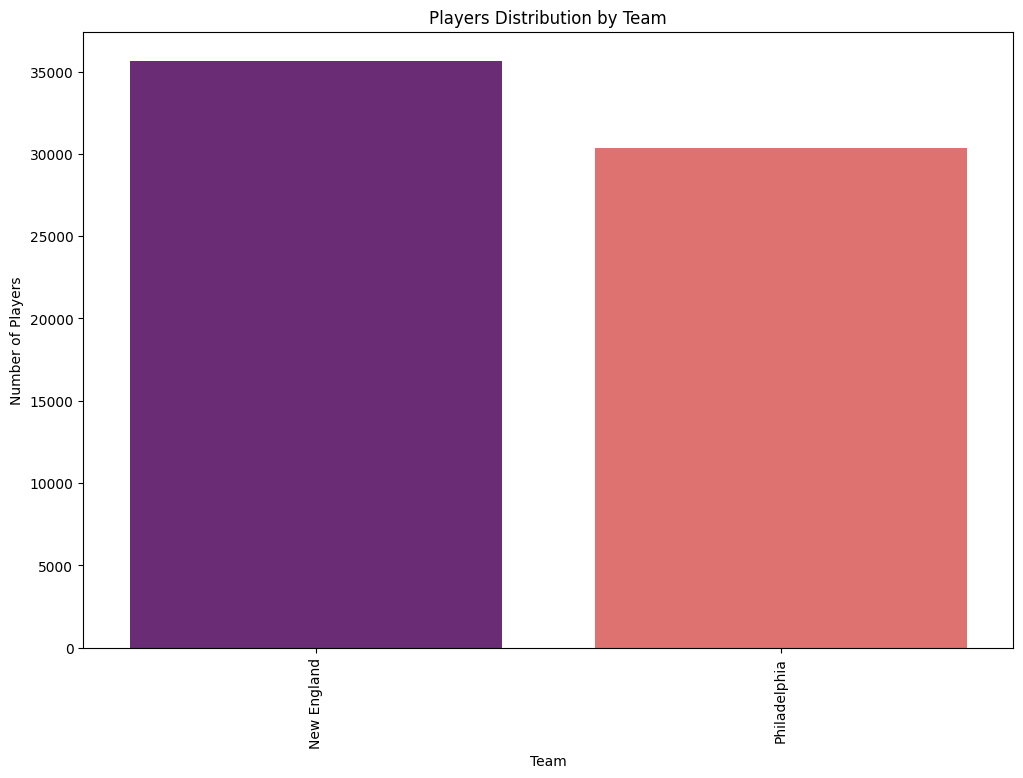

<Figure size 640x480 with 0 Axes>

In [ ]:
# Count the number of players per team
team_player_count = df['team'].value_counts()

# Plot the distribution of players by team
plt.figure(figsize=(12, 8))
sns.barplot(x=team_player_count.index, y=team_player_count.values, palette='magma')
plt.title('Players Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()


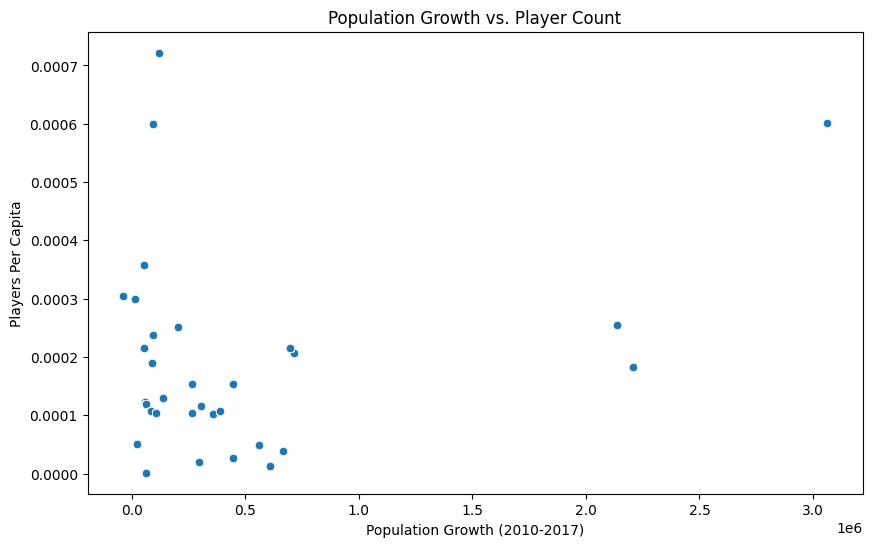

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate population growth for each state
df['population_growth'] = df['population_2017'] - df['population_2010_x']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_growth', y='players_per_capita', data=df)
plt.title('Population Growth vs. Player Count')
plt.xlabel('Population Growth (2010-2017)')
plt.ylabel('Players Per Capita')
plt.show()


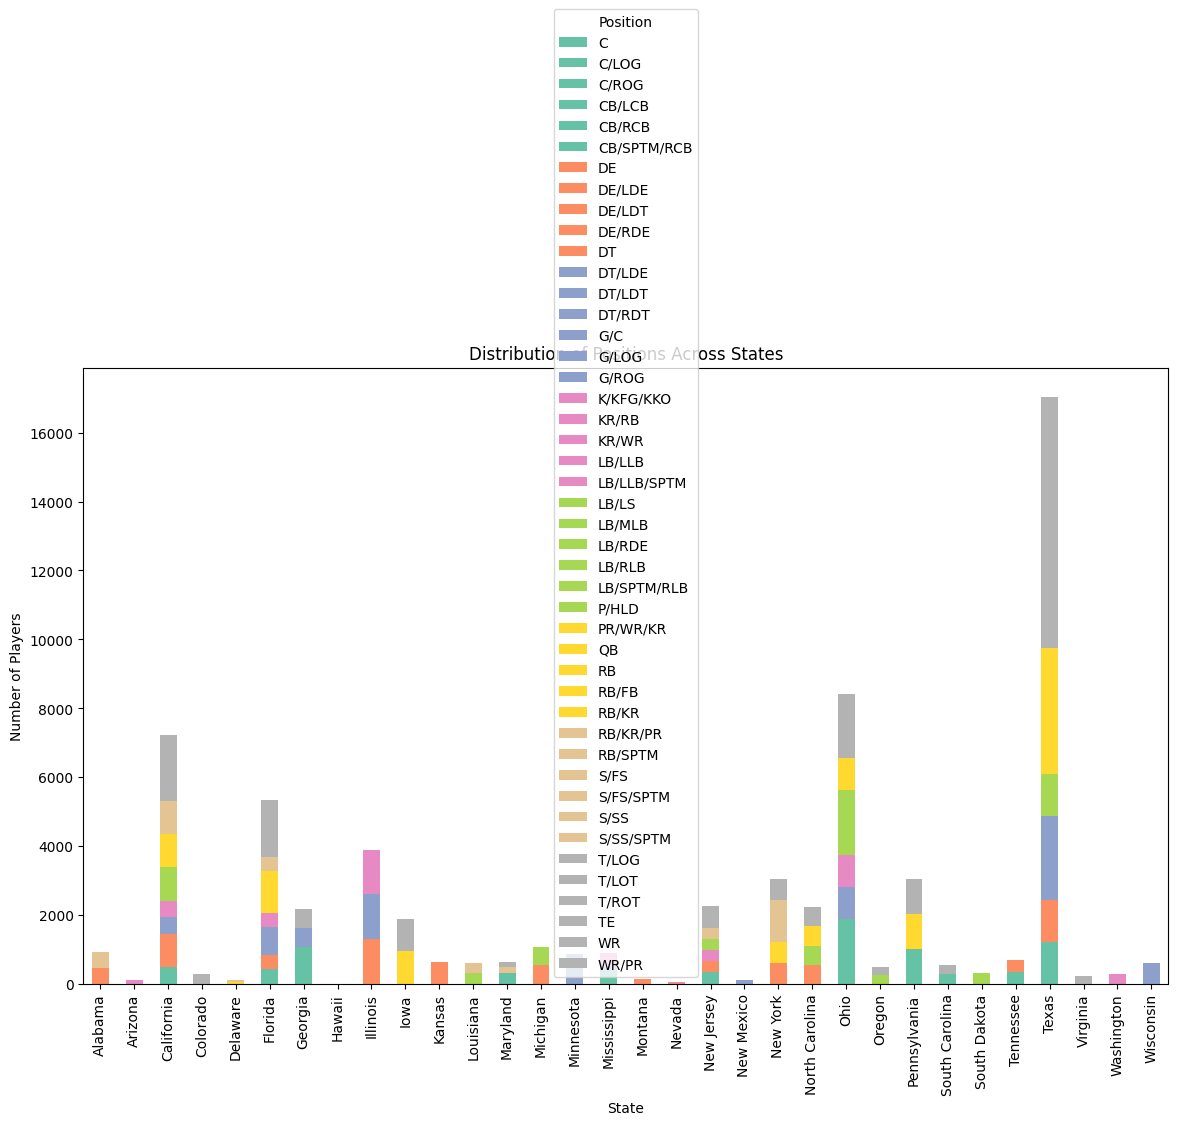

In [4]:
# Count the number of players per position by state
position_distribution = df.groupby(['state_name', 'position'])['player_name'].count().unstack()

# Plot the stacked bar chart
position_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='Set2')
plt.title('Distribution of Positions Across States')
plt.xlabel('State')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.legend(title='Position')
plt.show()


C:\Users\anura\AppData\Local\Temp\ipykernel_17404\2536021355.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=top_states_data, x='state_name', y='population_2017', label='Population 2017', palette='Blues')
C:\Users\anura\AppData\Local\Temp\ipykernel_17404\2536021355.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=top_states_data, x='state_name', y='player_name', label='Player Count', palette='Oranges')


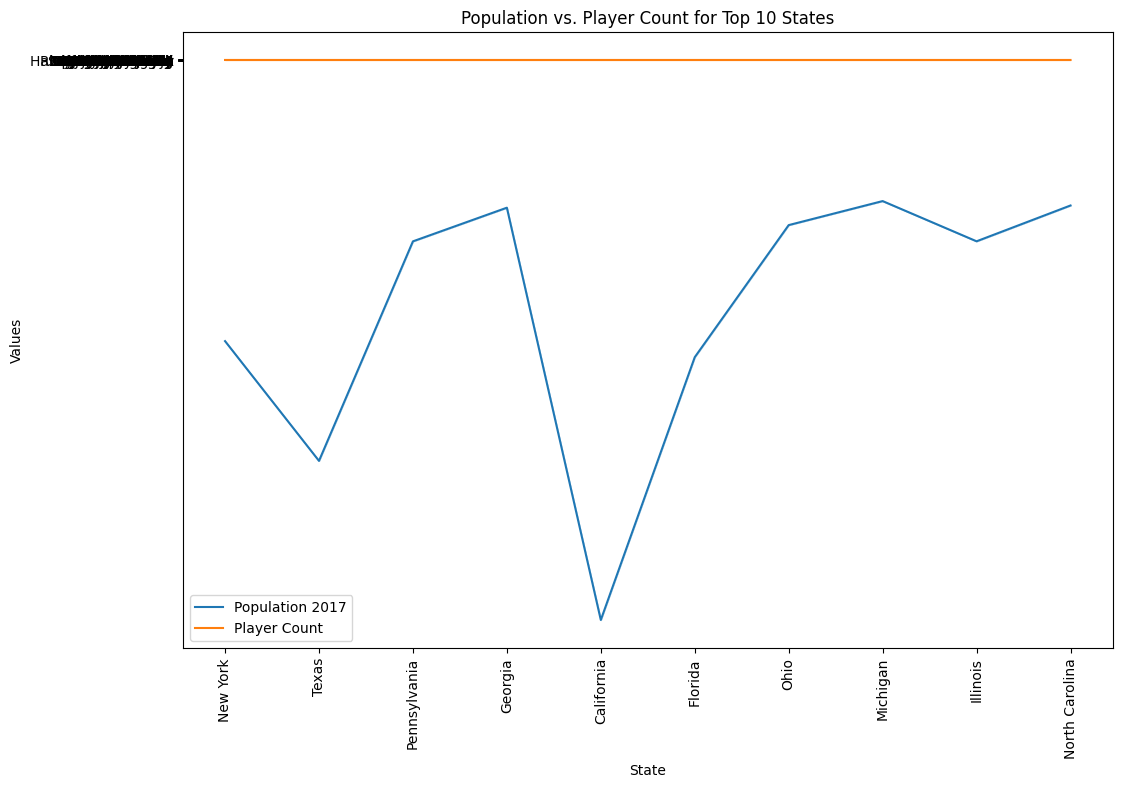

In [5]:
# Get the top 10 most populated states
top_states = df.groupby('state_name')['population_2017'].max().sort_values(ascending=False).head(10).index

# Filter the data for top states
top_states_data = df[df['state_name'].isin(top_states)]

# Plot the line chart for top states' population and player trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_states_data, x='state_name', y='population_2017', label='Population 2017', palette='Blues')
sns.lineplot(data=top_states_data, x='state_name', y='player_name', label='Player Count', palette='Oranges')
plt.title('Population vs. Player Count for Top 10 States')
plt.xlabel('State')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=90)
plt.show()
